In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,has_warranty,state,price_usd
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,False,owned,10900.00
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,False,owned,5000.00
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,False,owned,2800.00
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,False,owned,9999.00
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,False,owned,2134.11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  has_warranty       38531 non-null  bool   
 11  state              38531 non-null  object 
 12  price_usd          38531 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(7)
memory usage: 3.3+ MB


In [5]:
df.describe(include='all')

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,has_warranty,state,price_usd
count,38531,38531,38531,38531,38531.000000,38531.000000,38531,38531,38531,38521.000000,38531,38531,38531.000000
unique,55,1118,2,12,NaN,NaN,6,2,3,NaN,2,3,NaN
top,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,False,gasoline,NaN,False,owned,NaN
freq,4243,1423,25633,7705,NaN,NaN,24065,37184,25647,NaN,38082,37723,NaN
mean,NaN,NaN,NaN,NaN,248864.638447,2002.943734,NaN,NaN,NaN,2.055161,NaN,NaN,6639.971021
std,NaN,NaN,NaN,NaN,136072.376530,8.065731,NaN,NaN,NaN,0.671178,NaN,NaN,6428.152018
min,NaN,NaN,NaN,NaN,0.000000,1942.000000,NaN,NaN,NaN,0.200000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,158000.000000,1998.000000,NaN,NaN,NaN,1.600000,NaN,NaN,2100.000000
50%,NaN,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,NaN,2.000000,NaN,NaN,4800.000000
75%,NaN,NaN,NaN,NaN,325000.000000,2009.000000,NaN,NaN,NaN,2.300000,NaN,NaN,8990.000000


In [6]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
has_warranty          0
state                 0
price_usd             0
dtype: int64

In [7]:
# since there is soo less missing entries in engine capacity we will remove those missing entries\
    
df.dropna(inplace=True)

In [8]:
# now those missing entries are treated
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
has_warranty         0
state                0
price_usd            0
dtype: int64

In [9]:
df['engine_type'].unique()

array(['gasoline', 'diesel'], dtype=object)

In [10]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,has_warranty,state,price_usd
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,False,owned,10900.00
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,False,owned,5000.00
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,False,owned,2800.00
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,False,owned,9999.00
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,False,owned,2134.11


In [11]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'has_warranty', 'state', 'price_usd'],
      dtype='object')

In [12]:
target_col=['price_usd']
num_cols=['odometer_value', 'year_produced','engine_capacity']
cat_cols = ['transmission','engine_fuel', 'engine_has_gas','engine_type','has_warranty', 'state']

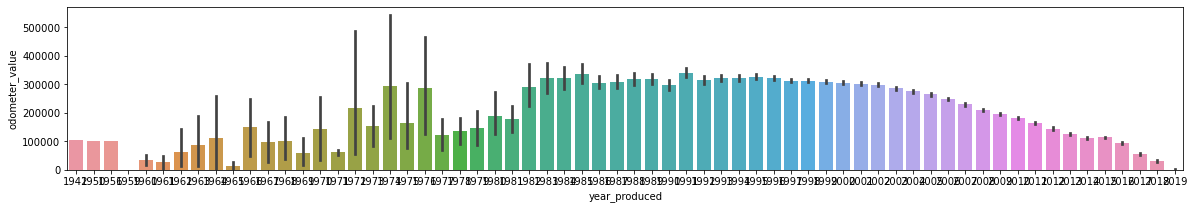

In [13]:
# now we can analyse our dataset to see its relation with each other and to do so we will get cat_cols and num_cols from our data set and plot few graphs from them and observe them to analyse our dataset to get the final features needed to do machine learning
plt.figure(figsize=(20,3))
sns.barplot(data = df,x='year_produced', y='odometer_value')
plt.show()

odometer_value


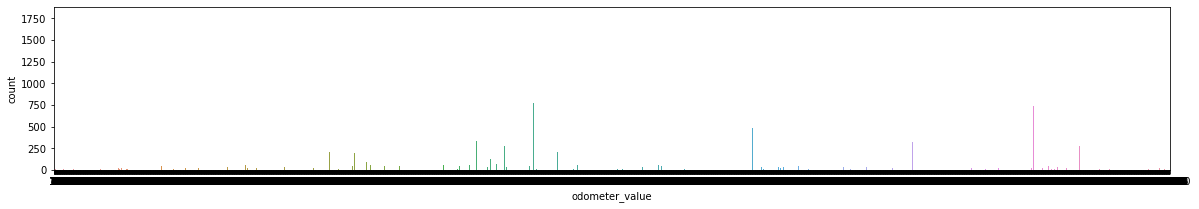

year_produced


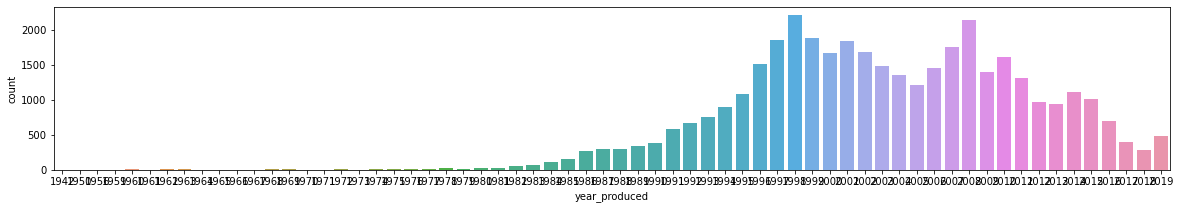

engine_capacity


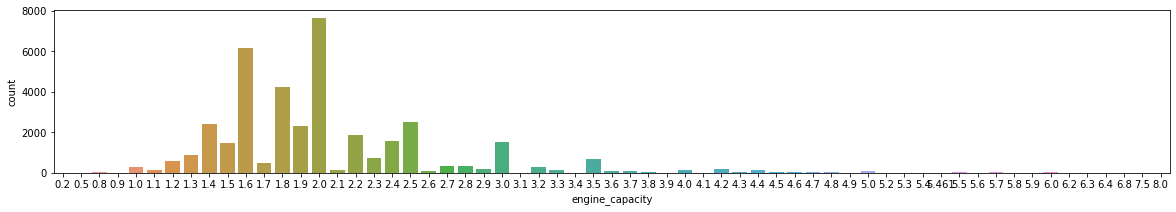

In [14]:
def numana(cols):
    print(cols)
    plt.figure(figsize=(20,3))
    sns.countplot(data=df,x=cols)
    plt.show()
for col in num_cols:
    numana(col)

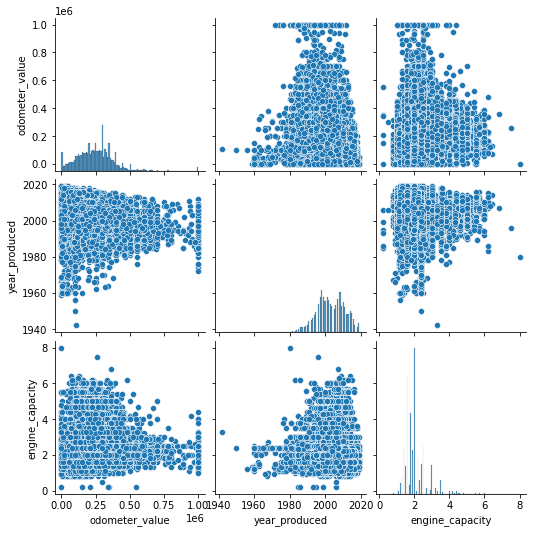

In [15]:
sns.pairplot(df[num_cols])

transmission


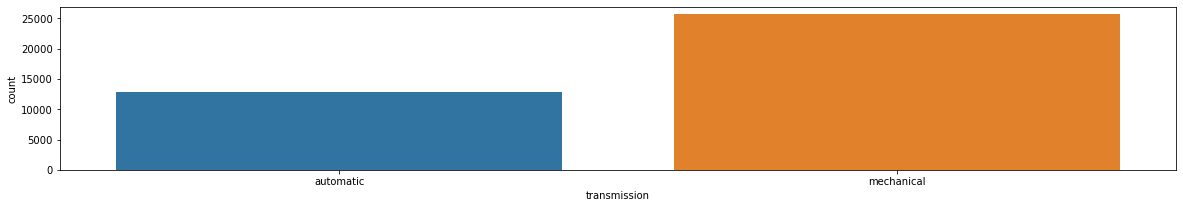

engine_fuel


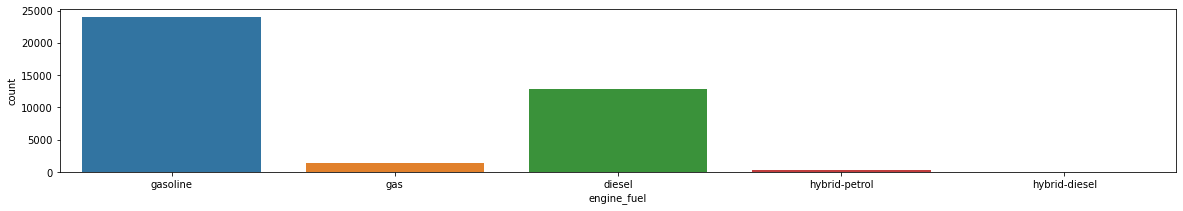

engine_has_gas


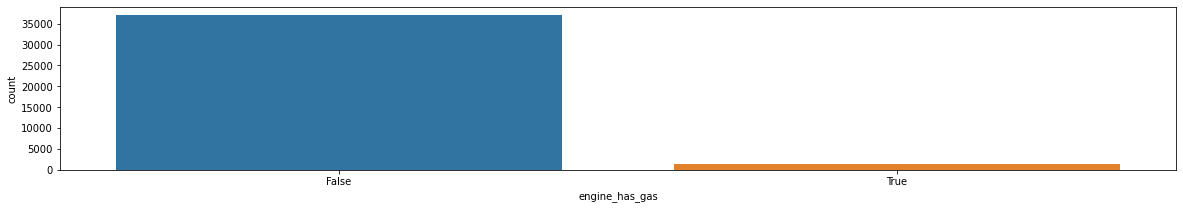

engine_type


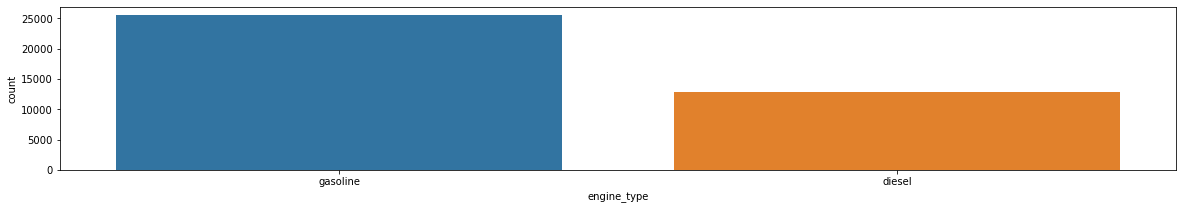

has_warranty


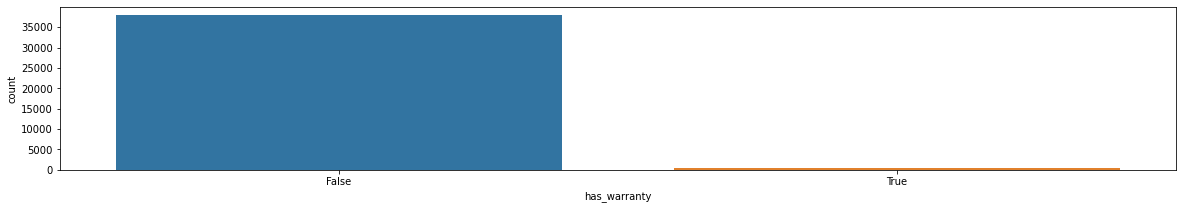

state


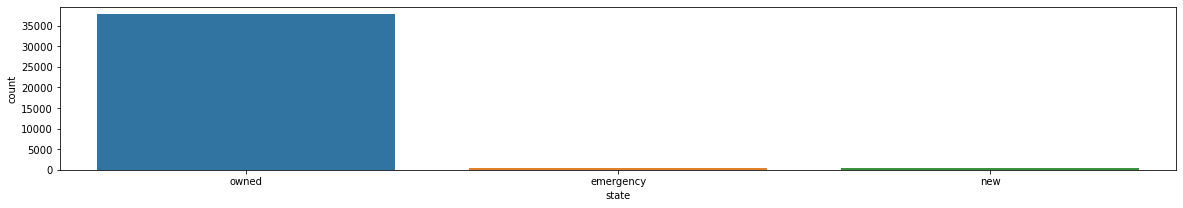

In [16]:
def catana(cols):
    print(cols)
    plt.figure(figsize=(20,3))
    sns.countplot(data=df,x=cols)
    plt.show()
for col in cat_cols:
    numana(col)

plot for transmission vs odometer_value


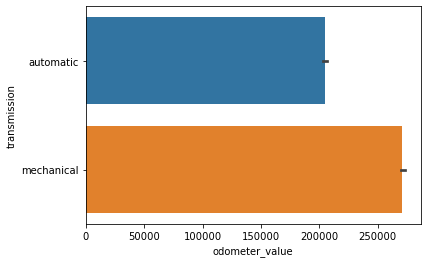

plot for transmission vs year_produced


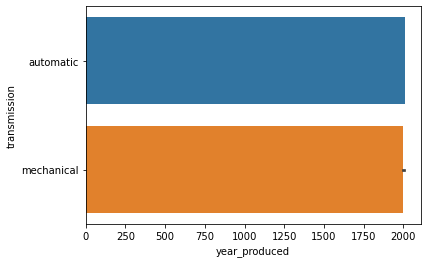

plot for transmission vs engine_capacity


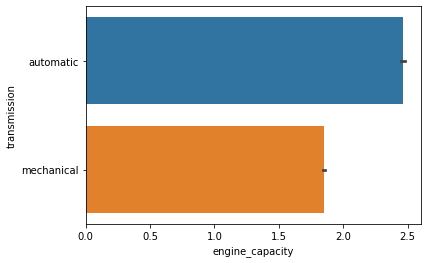

plot for engine_fuel vs odometer_value


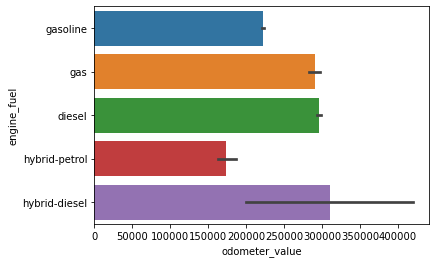

plot for engine_fuel vs year_produced


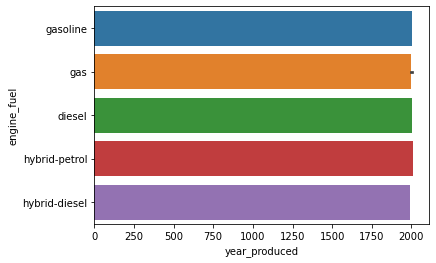

plot for engine_fuel vs engine_capacity


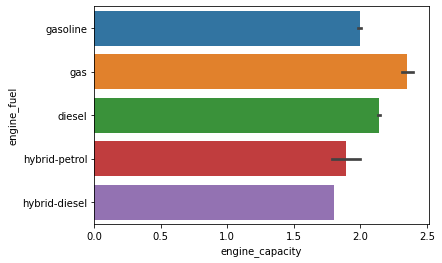

plot for engine_has_gas vs odometer_value


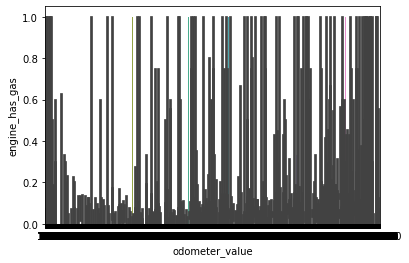

plot for engine_has_gas vs year_produced


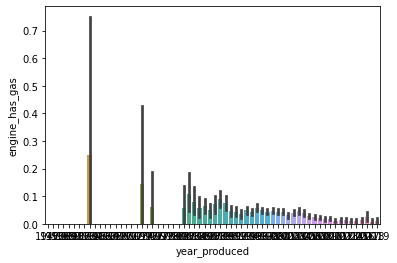

plot for engine_has_gas vs engine_capacity


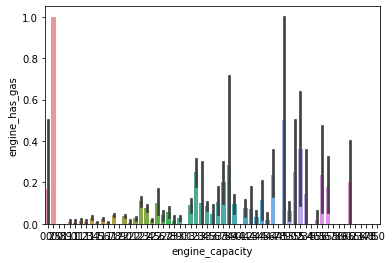

plot for engine_type vs odometer_value


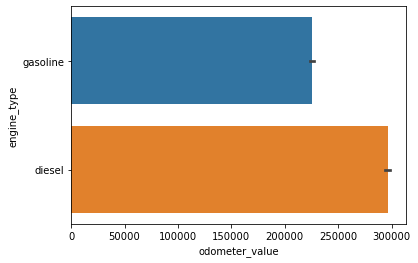

plot for engine_type vs year_produced


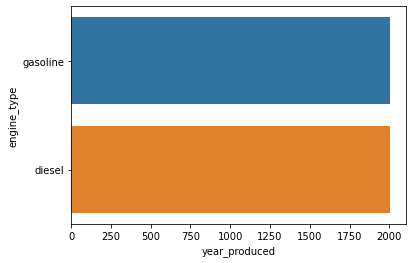

plot for engine_type vs engine_capacity


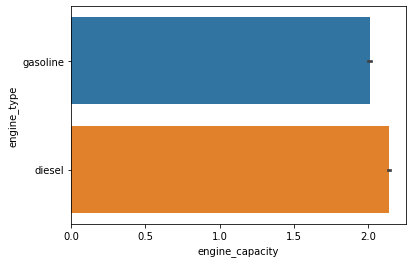

plot for has_warranty vs odometer_value


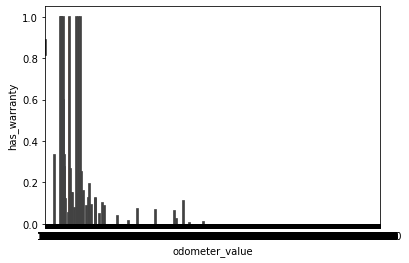

plot for has_warranty vs year_produced


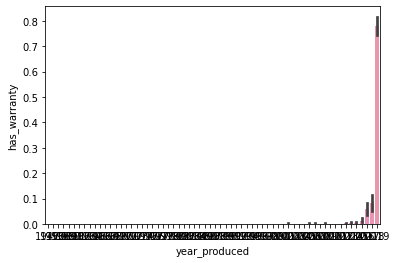

plot for has_warranty vs engine_capacity


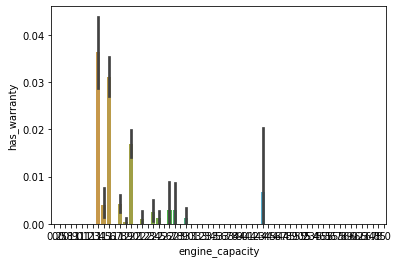

plot for state vs odometer_value


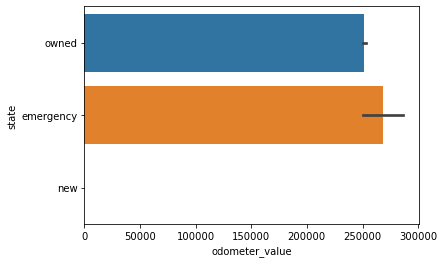

plot for state vs year_produced


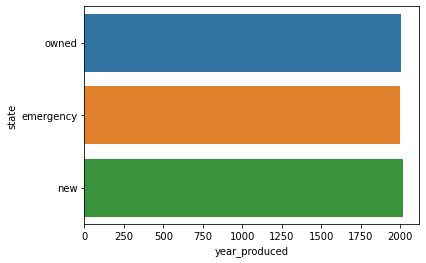

plot for state vs engine_capacity


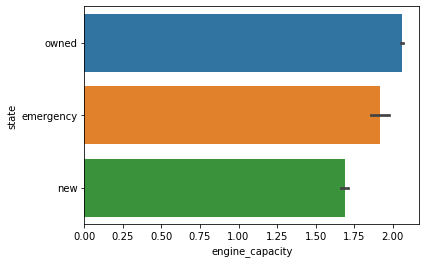

In [17]:
for col in cat_cols:
    for cols in num_cols:
        print('plot for',col,'vs',cols)
        sns.barplot(data=df, x=cols, y=col)
        plt.show()

<AxesSubplot:>

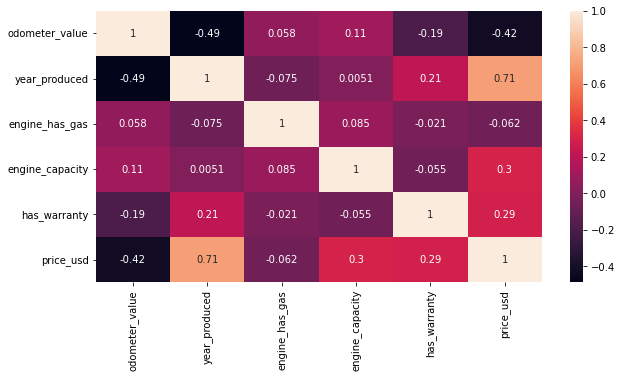

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [19]:
# from the above graphs we can observe that our target column "price_usd" is affected by 'Odometer value' as if it increase the price decreases, 'Year_produced' is the car is new the price is more, engine_capacity if the capacity of enien is high then the price is more but since it hav ot much bigger number of correlation we will see different aspects before considering it.

In [20]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,has_warranty,state,price_usd
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,False,owned,10900.00
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,False,owned,5000.00
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,False,owned,2800.00
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,False,owned,9999.00
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,False,owned,2134.11


In [21]:
drop_cols=['manufacturer_name','model_name','engine_fuel','engine_has_gas','state','color']

In [22]:
cars = df.drop(drop_cols,axis=1)

In [23]:
cars.head()

,transmission,odometer_value,year_produced,engine_type,engine_capacity,has_warranty,price_usd
0,automatic,190000,2010,gasoline,2.5,False,10900.00
1,automatic,290000,2002,gasoline,3.0,False,5000.00
2,automatic,402000,2001,gasoline,2.5,False,2800.00
3,mechanical,10000,1999,gasoline,3.0,False,9999.00
4,automatic,280000,2001,gasoline,2.5,False,2134.11


In [24]:
car_data=pd.get_dummies(cars)

In [25]:
car_data.head()

,odometer_value,year_produced,engine_capacity,has_warranty,price_usd,transmission_automatic,transmission_mechanical,engine_type_diesel,engine_type_gasoline
0,190000,2010,2.5,False,10900.00,1,0,0,1
1,290000,2002,3.0,False,5000.00,1,0,0,1
2,402000,2001,2.5,False,2800.00,1,0,0,1
3,10000,1999,3.0,False,9999.00,0,1,0,1
4,280000,2001,2.5,False,2134.11,1,0,0,1


In [26]:
drop2=['transmission_automatic','engine_type_diesel']

In [27]:
data = car_data.drop(drop2,axis=1)

In [28]:
data.head()

,odometer_value,year_produced,engine_capacity,has_warranty,price_usd,transmission_mechanical,engine_type_gasoline
0,190000,2010,2.5,False,10900.00,0,1
1,290000,2002,3.0,False,5000.00,0,1
2,402000,2001,2.5,False,2800.00,0,1
3,10000,1999,3.0,False,9999.00,1,1
4,280000,2001,2.5,False,2134.11,0,1


In [29]:
target = data['price_usd']
features = data.drop(['price_usd','odometer_value','has_warranty'],axis=1) #best model that can be created using this Dataset

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features, target , test_size = 0.25, random_state = 101)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
model.fit(xtrain,ytrain)
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)
model_rfn = RandomForestRegressor(n_estimators=200).fit(xtrain,ytrain)



print('Linear Model: ',round(100*model.score(xtest,ytest)),'%')
print('DT Model: ', round(100*model_dt.score(xtest,ytest)),'%')
print('RF Model: ', round(100*model_rfn.score(xtest,ytest)),'%')


Linear Model:  59 %
DT Model:  85 %
RF Model:  85 %


In [31]:
target = data['price_usd']
features = data.drop(['price_usd','has_warranty'],axis=1) # another try for a practical approach but it decrease the score so we wont take it.
features.columns

Index(['odometer_value', 'year_produced', 'engine_capacity',
       'transmission_mechanical', 'engine_type_gasoline'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

xtrain,xtest,ytrain,ytest = train_test_split(features, target , test_size = 0.25, random_state = 20)

model = LinearRegression()
model.fit(xtrain,ytrain)
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)
model_rfw = RandomForestRegressor(n_estimators=200).fit(xtrain,ytrain)



print('Linear Model: ',round(100*model.score(xtest,ytest)),'%')
print('DT Model: ', round(100*model_dt.score(xtest,ytest)),'%')
print('RF Model: ', round(100*model_rfw.score(xtest,ytest)),'%')


Linear Model:  62 %
DT Model:  75 %
RF Model:  84 %


In [33]:
data.columns

Index(['odometer_value', 'year_produced', 'engine_capacity', 'has_warranty',
       'price_usd', 'transmission_mechanical', 'engine_type_gasoline'],
      dtype='object')

In [34]:
query_data={'odometer_value':[1500],'year_produced':[2014],'engine_capacity':[2.4],'has_warranty':[True],'transmission_mechanical':[1],'engine_type_gasoline':[1]}

In [35]:
result=model_rfw.predict(pd.DataFrame(query_data, columns=xtrain.columns))
print(result[0])

12171.189000000002


In [36]:
pd.DataFrame(model_rfw.feature_importances_, index = xtrain.columns , columns = ['Importance']).sort_values(by = 'Importance' ,ascending=False)

,Importance
year_produced,0.644403
engine_capacity,0.210035
odometer_value,0.118818
engine_type_gasoline,0.014308
transmission_mechanical,0.012437


In [37]:
imp_cols = ['year_produced','engine_capacity','odometer_value','engine_type_gasoline']

In [45]:
model_rf = RandomForestRegressor().fit(xtrain[imp_cols],ytrain)
print('RF Model: ', round(100*model_rf.score(xtest[imp_cols],ytest)),'%')


RF Model:  83 %


In [40]:
pd.to_pickle(model_rfw,'model.pickle')